# Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
import os
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Dans un premier temps, nous vérifions que le fichier de données local est présent, sinon nous le téléchargeons depuis l'URL.

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
data_file = "weekly_in_situ_co2_mlo.csv"

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Les données sont ensuite chargées à l'aide de pandas.

In [3]:
raw_data = pd.read_csv(data_file, skiprows=44, names=["Date", "CO2"])

new_data = raw_data.copy()
new_data.set_index("Date", drop=True, inplace=True)             
new_data.index = pd.to_datetime(new_data.index, format="%Y-%m-%d")

new_data.head(5)

CO2
Date              
1958-03-29  316.19
1958-04-05  317.31
1958-04-12  317.69
1958-04-19  317.58
1958-04-26  316.48

Nous vérifions la présence de données manquantes.

In [4]:
new_data[new_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [CO2]
Index: []

Nous vérifions à présent si il n'y a pas de semaines manquantes.

In [15]:
dates = new_data.index
missing_weeks = 0
for dt1, dt2 in zip(dates[:-1], dates[1:]):
    delta = dt2 - dt1
    if delta > pd.Timedelta("7d"):
        print("From: {0:} To: {1:} Missing: {2:} days".format(dt1, dt2, delta.days))
        missing_weeks += (delta.days-7)/7
print("Total week missing: {0:}".format(missing_weeks))

From: 1958-05-03 00:00:00 To: 1958-05-17 00:00:00 Missing: 14 days
From: 1958-05-24 00:00:00 To: 1958-07-05 00:00:00 Missing: 42 days
From: 1958-08-16 00:00:00 To: 1958-08-30 00:00:00 Missing: 14 days
From: 1958-09-06 00:00:00 To: 1958-11-08 00:00:00 Missing: 63 days
From: 1959-01-31 00:00:00 To: 1959-02-14 00:00:00 Missing: 14 days
From: 1959-03-07 00:00:00 To: 1959-03-21 00:00:00 Missing: 14 days
From: 1959-05-23 00:00:00 To: 1959-06-06 00:00:00 Missing: 14 days
From: 1959-08-08 00:00:00 To: 1959-08-22 00:00:00 Missing: 14 days
From: 1962-08-18 00:00:00 To: 1962-09-15 00:00:00 Missing: 28 days
From: 1962-12-22 00:00:00 To: 1963-01-05 00:00:00 Missing: 14 days
From: 1963-02-09 00:00:00 To: 1963-02-23 00:00:00 Missing: 14 days
From: 1963-04-27 00:00:00 To: 1963-05-11 00:00:00 Missing: 14 days
From: 1963-11-16 00:00:00 To: 1963-11-30 00:00:00 Missing: 14 days
From: 1964-01-18 00:00:00 To: 1964-05-30 00:00:00 Missing: 133 days
From: 1964-06-06 00:00:00 To: 1964-06-27 00:00:00 Missing: 21

Aucune donnée n'est visiblement manquante dans le fichier, autrement dit toutes les lignes présentes bien une valeur.
En revanche nous voyons qu'il manque un certain nombre de semaines dans le fichier 72 au total dans le fichier.
Nous voyons également que l'année 1964 est celle présentant le moins de relevés hebdomadaires, en partie dû à un intervalle de 133 jours entre deux relevés.
Nous gardons donc cette information en mémoire pour la suite de l'analyse.

A présent, nous pouvons représenter les données.

Text(0,0.5,'$\\rm CO_2$ [ppm]')

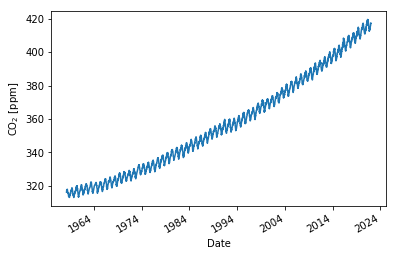

In [6]:
new_data["CO2"].plot()
plt.ylabel(r"$\rm CO_2$ [ppm]")